In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('2012-2013_cleaned2.csv', index_col=0)

In [3]:
df

,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,acc_open_past_24mths,mort_acc,percent_bc_gt_75,loan_status
0,12000.0,0.124432,7.62,373.94,32,Systems Engineer,3.0,0.142148,96500.0,0.122274,2013-12-01,Borrower added on 12/31/13 > Bought a new ho...,0.165022,Debt Consolidation and Credit Transfer,782xx,0.140666,12.61,0.0,123,705.0,709.0,0.0,17.0,13248.0,55.7,30.0,4.00000,1.00000,100.000000,0.0
1,27050.0,0.124432,10.99,885.46,28,Team Leadern Customer Ops & Systems,10.0,0.158888,55000.0,0.177538,2013-12-01,Borrower added on 12/31/13 > Combining high ...,0.165022,Debt Consolidation,481xx,0.165297,22.87,0.0,326,730.0,734.0,0.0,14.0,36638.0,61.2,27.0,3.00000,4.00000,25.000000,0.0
2,12000.0,0.124432,11.99,398.52,27,LTC,10.0,0.142148,130000.0,0.160987,2013-12-01,NaN,0.165022,Debt consolidation,809xx,0.126967,13.03,0.0,193,715.0,719.0,1.0,9.0,10805.0,67.0,19.0,4.00000,3.00000,1.000000,0.0
3,28000.0,0.124432,7.62,872.52,32,Area Sales Manager,5.0,0.142148,325000.0,0.160987,2013-12-01,NaN,0.165022,Pay off other Installment loan,945xx,0.148025,18.55,0.0,229,745.0,749.0,1.0,15.0,29581.0,54.6,31.0,6.00000,5.00000,16.700000,0.0
4,27600.0,0.255994,19.97,730.78,15,Street Operations Supervisor,6.0,0.142148,73000.0,0.160987,2013-12-01,Borrower added on 12/31/13 > I had some wate...,0.165022,Consolidation of debt and home improve.,802xx,0.126967,23.13,1.0,294,665.0,669.0,1.0,10.0,27003.0,82.8,24.0,2.00000,4.00000,80.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180304,12000.0,0.124432,7.90,375.49,31,mpmi,3.0,0.142148,42000.0,0.122274,2012-01-01,Borrower added on 12/11/11 > pay off credit ...,0.128642,credit card payoff,619xx,0.137417,9.83,0.0,129,720.0,724.0,0.0,9.0,14378.0,52.3,14.0,3.92953,1.81102,53.558127,0.0
180305,20500.0,0.124432,16.77,728.54,18,NaN,7.0,0.172892,60000.0,0.160987,2012-01-01,Borrower added on 12/08/11 > I will be payin...,0.165022,Payoff Loan,100xx,0.171307,16.40,1.0,279,700.0,704.0,3.0,10.0,15417.0,58.4,20.0,3.92953,1.81102,53.558127,0.0
180306,15000.0,0.124432,15.27,521.97,21,NaN,3.0,0.172892,57600.0,0.160987,2012-01-01,NaN,0.254734,business loan,900xx,0.148025,8.35,2.0,96,680.0,684.0,1.0,18.0,8897.0,33.1,30.0,3.92953,1.81102,53.558127,0.0
180307,35000.0,0.124432,15.96,1229.81,20,Tom and Holly Gores,3.0,0.142148,160000.0,0.160987,2012-01-01,NaN,0.254734,Small Business Loan,922xx,0.148025,4.90,0.0,136,720.0,724.0,1.0,9.0,23665.0,62.4,17.0,3.92953,1.81102,53.558127,0.0


In [4]:
y=df['loan_status']
df.drop(columns=['emp_title','issue_d','desc','title','zip_code','loan_status'], inplace=True)
scaler=MinMaxScaler()
scaler.fit(df)
scaled=scaler.transform(df)
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.3)

y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

In [5]:
print(X_train.shape)
print(X_test.shape)

(126216, 24)
(54093, 24)


In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(24,)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [38]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['acc'])

In [6]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>=0.9):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()

In [56]:
hist = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[callbacks])

Train on 126216 samples, validate on 54093 samples
Epoch 1/100
126216/126216 [==============================] - 7s 52us/sample - loss: 0.4087 - acc: 0.8430 - val_loss: 0.4021 - val_acc: 0.8453
Epoch 2/100
126216/126216 [==============================] - 5s 39us/sample - loss: 0.4049 - acc: 0.8436 - val_loss: 0.4041 - val_acc: 0.8453
Epoch 3/100
126216/126216 [==============================] - 5s 39us/sample - loss: 0.4041 - acc: 0.8436 - val_loss: 0.4025 - val_acc: 0.8453
Epoch 4/100
126216/126216 [==============================] - 5s 39us/sample - loss: 0.4036 - acc: 0.8436 - val_loss: 0.4009 - val_acc: 0.8453
Epoch 5/100
126216/126216 [==============================] - 5s 39us/sample - loss: 0.4032 - acc: 0.8436 - val_loss: 0.4018 - val_acc: 0.8453
Epoch 6/100
126216/126216 [==============================] - 5s 39us/sample - loss: 0.4027 - acc: 0.8436 - val_loss: 0.4091 - val_acc: 0.8453
Epoch 7/100
126216/126216 [==============================] - 5s 39us/sample - loss: 0.4026 - acc:

Epoch 58/100
126216/126216 [==============================] - 5s 39us/sample - loss: 0.3941 - acc: 0.8443 - val_loss: 0.4039 - val_acc: 0.8440
Epoch 59/100
126216/126216 [==============================] - 5s 40us/sample - loss: 0.3938 - acc: 0.8447 - val_loss: 0.4037 - val_acc: 0.8444
Epoch 60/100
126216/126216 [==============================] - 5s 40us/sample - loss: 0.3936 - acc: 0.8446 - val_loss: 0.4054 - val_acc: 0.8416
Epoch 61/100
126216/126216 [==============================] - 5s 41us/sample - loss: 0.3935 - acc: 0.8445 - val_loss: 0.4057 - val_acc: 0.8443
Epoch 62/100
126216/126216 [==============================] - 5s 39us/sample - loss: 0.3936 - acc: 0.8446 - val_loss: 0.4044 - val_acc: 0.8445
Epoch 63/100
126216/126216 [==============================] - 5s 39us/sample - loss: 0.3932 - acc: 0.8446 - val_loss: 0.4048 - val_acc: 0.8438
Epoch 64/100
126216/126216 [==============================] - 5s 39us/sample - loss: 0.3930 - acc: 0.8445 - val_loss: 0.4040 - val_acc: 0.8441

In [62]:
predictions=model.predict(X_test)

In [87]:
predictions=np.array(predictions)
for i in range(len(predictions)):
    if predictions[i]<0.5:
        predictions[i]=0.0
    else:
        predictions[i]=1.0
            

In [96]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91     45725
         1.0       0.37      0.02      0.03      8368

    accuracy                           0.84     54093
   macro avg       0.61      0.51      0.47     54093
weighted avg       0.77      0.84      0.78     54093

[[45491   234]
 [ 8230   138]]


In [101]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(24,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.01))])

In [102]:
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['acc'])

In [103]:
hist = model_2.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[callbacks])

Train on 126216 samples, validate on 54093 samples
Epoch 1/20
126216/126216 [==============================] - 7s 55us/sample - loss: 0.4949 - acc: 0.8432 - val_loss: 0.4340 - val_acc: 0.8453
Epoch 2/20
126216/126216 [==============================] - 6s 51us/sample - loss: 0.4367 - acc: 0.8436 - val_loss: 0.4318 - val_acc: 0.8453
Epoch 3/20
126216/126216 [==============================] - 6s 51us/sample - loss: 0.4350 - acc: 0.8436 - val_loss: 0.4312 - val_acc: 0.8453
Epoch 4/20
126216/126216 [==============================] - 7s 52us/sample - loss: 0.4344 - acc: 0.8436 - val_loss: 0.4313 - val_acc: 0.8453
Epoch 5/20
126216/126216 [==============================] - 7s 52us/sample - loss: 0.4340 - acc: 0.8436 - val_loss: 0.4310 - val_acc: 0.8453
Epoch 6/20
126216/126216 [==============================] - 7s 53us/sample - loss: 0.4340 - acc: 0.8436 - val_loss: 0.4310 - val_acc: 0.8453
Epoch 7/20
126216/126216 [==============================] - 6s 50us/sample - loss: 0.4339 - acc: 0.8436

In [104]:
predictions2=model_2.predict(X_test)
predictions2=np.array(predictions2)
for i in range(len(predictions2)):
    if predictions2[i]<0.5:
        predictions2[i]=0.0
    else:
        predictions2[i]=1.0
            

In [105]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91     45725
         1.0       0.37      0.02      0.03      8368

    accuracy                           0.84     54093
   macro avg       0.61      0.51      0.47     54093
weighted avg       0.77      0.84      0.78     54093

[[45491   234]
 [ 8230   138]]


In [9]:
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(24,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.01))])

In [11]:
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['acc'])

In [13]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [14]:
hist = model_3.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[callbacks, earlystop])

Train on 126216 samples, validate on 54093 samples
Epoch 1/20
126216/126216 [==============================] - 11s 89us/sample - loss: 0.4195 - acc: 0.8444 - val_loss: 0.4142 - val_acc: 0.8435
Epoch 2/20
126216/126216 [==============================] - 11s 84us/sample - loss: 0.4194 - acc: 0.8444 - val_loss: 0.4240 - val_acc: 0.8435
Epoch 3/20
126216/126216 [==============================] - 11s 89us/sample - loss: 0.4191 - acc: 0.8444 - val_loss: 0.4142 - val_acc: 0.8435
Epoch 4/20
126216/126216 [==============================] - 11s 88us/sample - loss: 0.4192 - acc: 0.8444 - val_loss: 0.4168 - val_acc: 0.8435
Epoch 5/20
126216/126216 [==============================] - 11s 86us/sample - loss: 0.4185 - acc: 0.8444 - val_loss: 0.4224 - val_acc: 0.8435
Epoch 6/20
126216/126216 [==============================] - 11s 88us/sample - loss: 0.4184 - acc: 0.8444 - val_loss: 0.4133 - val_acc: 0.8435
Epoch 7/20
126216/126216 [==============================] - 11s 84us/sample - loss: 0.4182 - acc:

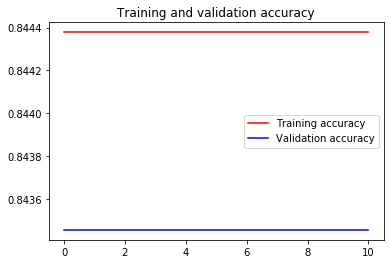

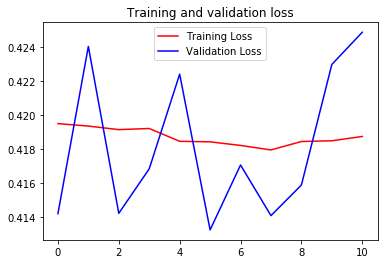

In [21]:
import matplotlib.pyplot as plt
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()